# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

In [3]:
# VIN Charles
# DELEFOSSE Aymeric

# TME 03 - Opérateurs d'agrégation et LIME

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic

## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [5]:
def weighted_mean(x, poids):
    return (x * poids).sum() / poids.sum()

<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
</div>

In [6]:
def plot_2d_and_3d(u, v, z):
    U, V = np.meshgrid(u, v)

    # Create a 2D plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.contourf(U, V, z, levels=np.linspace(0, 1, 11), cmap="viridis")
    plt.colorbar(label="Function Value")
    plt.xlabel("u")
    plt.ylabel("v")
    plt.title("2D Contour Plot")

    # Create a 3D plot
    plt.subplot(1, 2, 2, projection="3d")
    ax = plt.gca()
    surf = ax.plot_surface(U, V, z, cmap="viridis")
    # plt.colorbar(surf, label="Function Value")
    ax.set_xlabel("u")
    ax.set_ylabel("v")
    ax.set_zlabel("Function Value")
    plt.title("3D Surface Plot")

    # Adjust subplot layout
    plt.tight_layout()

    # Show the plots
    plt.show()

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [7]:
def owa(x, w):
    # Step 1: Sort the vector in descending order
    x_sorted = np.sort(x)
    return (x_sorted * w).sum()

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>


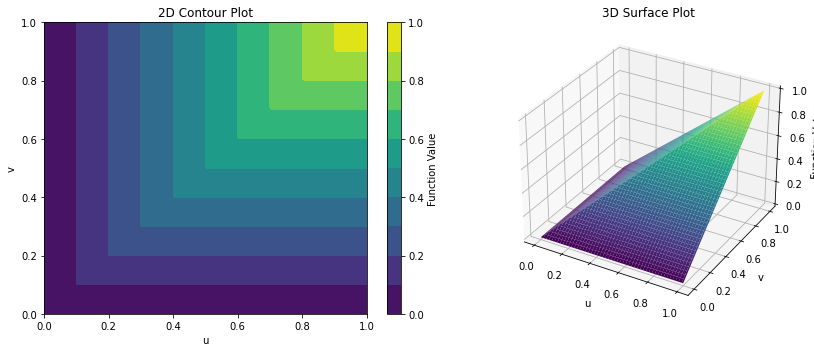

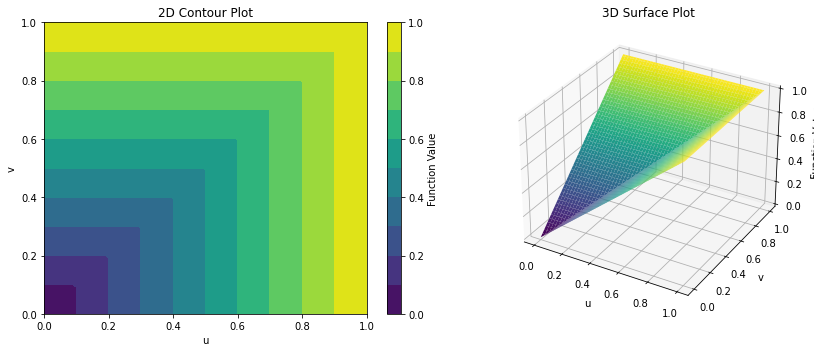

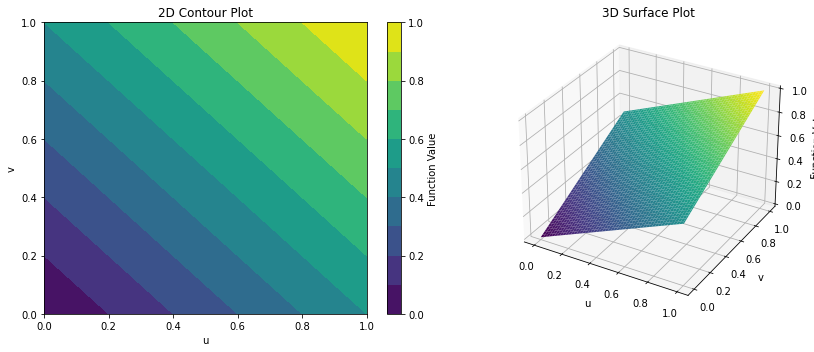

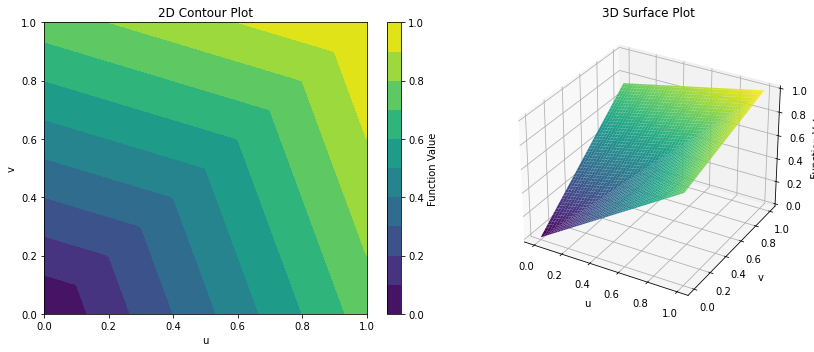

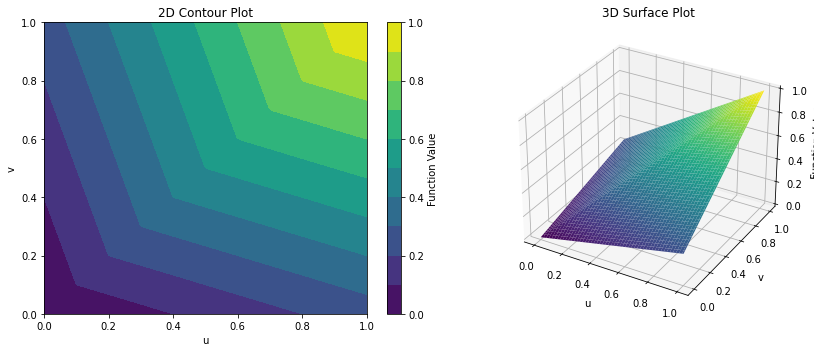

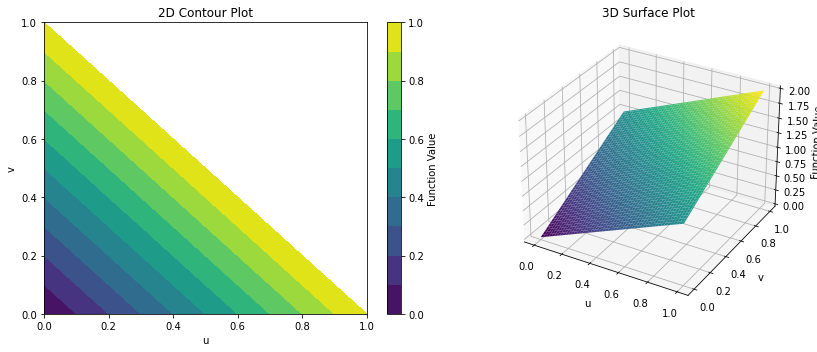

In [8]:
x = np.array([np.linspace(0, 1, 100), np.linspace(0, 1, 100)])
w_list = [np.array([1, 0]), np.array([0, 1]), np.array([0.5, 0.5]), np.array([0.25, 0.75]), np.array([0.75, 0.25]), np.array([1,1]) ]
for w in w_list:
    u, v = x[0], x[1]
    U, V = np.meshgrid(u, v)
    z = np.where(U <= V, w[0] * U + w[1] * V, w[1] * U + w[0] * V)
    plot_2d_and_3d(u, v, z)
    

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

* $ \sigma $ représente les indices de $x$ **trié**
* Les $ A_{\sigma(i)} $ sont représenté par des `frozenset` d'indice de $x$ **trié**
* $\mu$ doit être défini de manière assez précise. Il prend la forme d'un dictionnaire avec pour clé un $ A_{\sigma(i)} $ qui est donc un `frozenset()` dans l'implémentation. La valeur associé à cette clé est la valeur de $ \mu(A_{\sigma(i)}) $. Chaque valeur $i$ dans le `frozenset()` est associé à la valeur d'indice $i$ du $x$ trié (=$\sigma (i)$)

Pour créer le dictionnaire $\mu$ 
1. Défini un $x$
2. Le trier 
3. Choisir les indices $\sigma(i)$ du $x$ trié pour obtenir la clé du dictionnaire $\mu$. Et attribuer la valeur $\mu(A_{\sigma(i)}$ souhaité. 

In [9]:
def check_mu(mu, x):
    """
    Vérifie que : 
    * \mu(A_\sigma{1}) = 1
    * Croissance
    """
    sig = x.argsort()
    assert mu[frozenset(sig)] == 1, "Problème de condition à la borne sup pour mu"
    assert mu[frozenset([])] == 0, "Problème de condition à la borne inf pour mu"
    # Croissance
    # On vas construire un dictionnaire qui regarde pour chaque cardinal du fronzenset (A_sigma(i))
    # Si les valeur sont bien croissante
    d = {} # key : card, value : max value found in mu for this card of A_sigma(i)
    for key in mu.keys():
        card_A = len(key)
        tmp = d.get(card_A, 0)
        if tmp < mu[key]:  # Si la valeur de mu est plus grande que la valeur stocké actuellement pour ce cardinal on la remplace 
                tmp = mu[key]
        d[card_A] = tmp

    # Vérification de la croissance pour chaque cardinal
    try:
        tmp = 0
        for i in range(1, len(sig)): # On peut faire un for i in range simplement car normalement mu comporte tout les cardinal de 0 à len(sig)
            assert d[i-1] < d[i], "Problème de croissance pour mu"
    except KeyError:
        raise KeyError("Il manque des valeurs dans mu")
    return True

def choquet(x, mu):
    """
    mu aura la forme d'une dictionnaire. Soit A_{\sigma(i)} = set([\sigma_i, ..., \sigma_n])
    key : str(A_{\sigma(i)}) 
    value : mu(A_{\sigma(i)})
    """
    assert check_mu(mu, x)
    
    x_sorted = np.argsort(x)
    # ic(x_sorted)
    sum = 0
    for i in range(len(x)):
        key_i = frozenset(x_sorted[ i : ])
        key_ip1 = frozenset(x_sorted[ i + 1 : ])
        # ic(key_i)
        # ic(key_ip1)
        sum += ( mu[frozenset(key_i)] - mu[frozenset(key_ip1)]) * x[x_sorted[i]]
    return sum

Text avec des mu ne vérifiant pas les conditions d'une capacité

In [11]:
mu = {
    frozenset([0,1]) : 0.95, # /!\
    frozenset([0]) : 0.5,
    frozenset([1]) : 0.9,
    frozenset([]): 0
}
try:
    check_mu(mu, np.array([1,2]))
except AssertionError as err:
    print(err)

Problème de condition à la borne sup pour mu


In [13]:

mu = {
    frozenset([0,1]) : 1, # /!\
    frozenset([0]) : 0.5,
    frozenset([1]) : 0.9,
    frozenset([]): 0.05
}
try:
    check_mu(mu, np.array([1,2]))
except AssertionError as err:
    print(err)

Problème de condition à la borne inf pour mu


In [14]:

mu = {
    frozenset([0,1,2]) : 1,
    frozenset([0,1]) : 0.3,
    frozenset([0,2]) : 0.2,
    frozenset([1,2]) : 0.2,
    frozenset([0]) : 0.15,
    frozenset([1]) : 0.1,
    frozenset([2]) : 0.1,
    frozenset([]): 0
}
check_mu(mu, np.array([1,2,3]))

True

In [15]:

mu = {
    frozenset([0,1,2]) : 1, 
    frozenset([0,1]) : 0.3, 
    frozenset([0,2]) : 0.2, 
    frozenset([1,2]) : 0.2, 
    frozenset([0]) : 0.4, # /!\
    frozenset([1]) : 0.1,
    frozenset([2]) : 0.1,
    frozenset([]): 0
}
try:
    check_mu(mu, np.array([1,2,3]))
except AssertionError as err:
    print(err)

Problème de croissance pour mu


Test de l'intégrale de Choquet

In [16]:
# Exemple du cours 
x = np.array([1, 1])

mu = {
    frozenset([0,1]) : 1,
    frozenset([0]) : 0.5,
    frozenset([1]) : 0.9,
    frozenset([]): 0
}

"""
x_1 < x_2
=> 0.1 x_1  + 0.9 x_2
"""
print(choquet(x, mu))
assert round(choquet(x, mu), 5) == round(0.1 * x[0] + 0.9 * x[1], 5) # round nécéssaire à cause des 1.90000000000001

1.0


In [17]:
# Exemple du cours 
x = np.array([1, 2])
mu = {
    frozenset([0,1]) : 1,
    frozenset([0]) : 0.5,
    frozenset([1]) : 0.9,
    frozenset([]): 0
}

"""
x_1 < x_2
=> 0.1 x_1  + 0.9 x_2
"""
print(choquet(x, mu))
assert round(choquet(x, mu), 5) == round(0.1 * x[0] + 0.9 * x[1], 5) # round nécéssaire à cause des 1.90000000000001

1.9


In [18]:
# Exemple du cours 
x = np.array([2, 1])
# x trié : [1, 2]
mu = {
    frozenset([0,1]) : 1,
    frozenset([0]) : 0.5, # on associe {1} à 0.5
    frozenset([1]) : 0.9, # on associe {2} à 0.9
    frozenset([]): 0
}

"""
x_1 > x_2
=> 0.5 x_1  + 0.5 x_2
"""
print(choquet(x, mu))
assert round(choquet(x, mu), 5) == round(0.5 * x[0] + 0.5 * x[1], 5) # round nécéssaire 

1.5


<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres. 
</div>

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus. 
</div>

<div>
</div>

In [37]:
# Commentaire :

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [19]:
from sklearn import datasets

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [20]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

In [21]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error',
 'fractal dimension error', 'worst radius', 'worst texture',
 'worst perimeter', 'worst area', 'worst smoothness',
 'worst compactness', 'worst concavity', 'worst concave points',
 'worst symmetry', 'worst fractal dimension'], dtype='%lt;U23')

<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=42)

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

In [23]:
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

In [24]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error',
 'fractal dimension error', 'worst radius', 'worst texture',
 'worst perimeter', 'worst area', 'worst smoothness',
 'worst compactness', 'worst concavity', 'worst concave points',
 'worst symmetry', 'worst fractal dimension'], dtype='%lt;U23')

In [25]:
target_names

array(['malignant', 'benign'], dtype='%lt;U9')

## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LogisticRegression LogisticRegression()

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

In [27]:
y_pred = logreg.predict(X_test)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

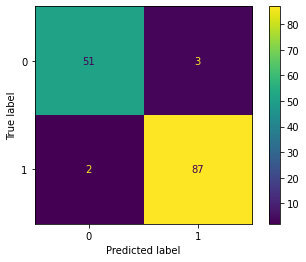

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score

ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [29]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='binary')

0.9720670391061451

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

<Axes: >

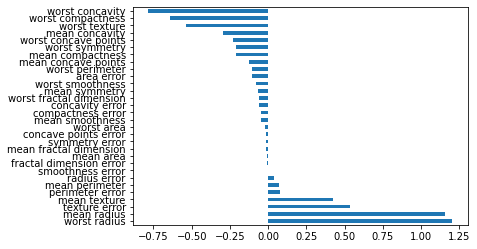

In [30]:
import pandas as pd
coefs = logreg.coef_[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

In [31]:
pd.Series(coefs, index=feature_names).nlargest(coefs.size)

worst radius 1.205292
mean radius 1.156756
texture error 0.534840
mean texture 0.426924
perimeter error 0.079875
mean perimeter 0.074081
radius error 0.037798
smoothness error -0.004044
fractal dimension error -0.004239
mean area -0.006832
mean fractal dimension -0.013762
symmetry error -0.015413
concave points error -0.016095
worst area -0.022568
mean smoothness -0.043949
compactness error -0.044617
concavity error -0.060162
worst fractal dimension -0.060519
mean symmetry -0.065887
worst smoothness -0.079521
area error -0.103819
worst perimeter -0.104382
mean concave points -0.125381
mean compactness -0.211526
worst symmetry -0.211972
worst concave points -0.231687
mean concavity -0.292371
worst texture -0.538932
worst compactness -0.638579
worst concavity -0.785348
dtype: float64

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

<Axes: >

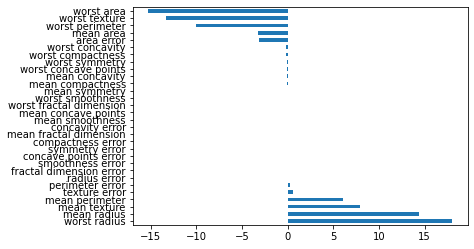

In [32]:
import pandas as pd
pd.Series(coefs * X_test[0], index=feature_names).nlargest(coefs.size).plot(kind='barh')

## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

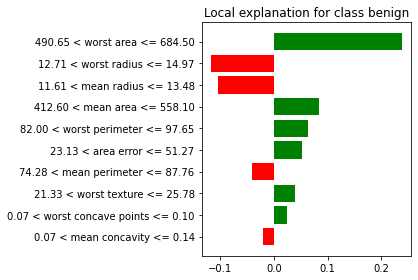

In [33]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], logreg.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

In [34]:
exp.show_in_notebook()

**Commentaire** : Le premier exemple de la base de test a été classifié tel que *begnin* (1). 





lime se demande si est ce que le fait que cet attribut soit dans cet intervalle qui est important, pas seulement la feature en elle même

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

In [35]:
exp.show_in_notebook()

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME, par exemple pour examiner sa stabilité par rapport à la donné d'intérêt ou par rapport au classifieur, selon un protocole que vous définirez après avoir spécifié l'étude que vous souhaitez mener.
</div>

In [36]:
from tqdm.autonotebook import tqdm
stable = []

for _ in tqdm(range(100)):
    explainer = LimeTabularExplainer(X_test,
        feature_names=feature_names,
        class_names=target_names,
        categorical_features=[],
        mode='classification')

    exp = explainer.explain_instance(X_test[0], logreg.predict_proba, num_features=10)
    stable.append(exp.as_list())

stable = np.array(stable)

<ipython-input-36-3748cade0453>:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

In [ ]:
print('feur')

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

In [ ]:
print('feur')

## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>

In [ ]:
print('feur')